In [1]:
import time
import data_extract as de
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import strategy as s

# Strategy buy/sell early

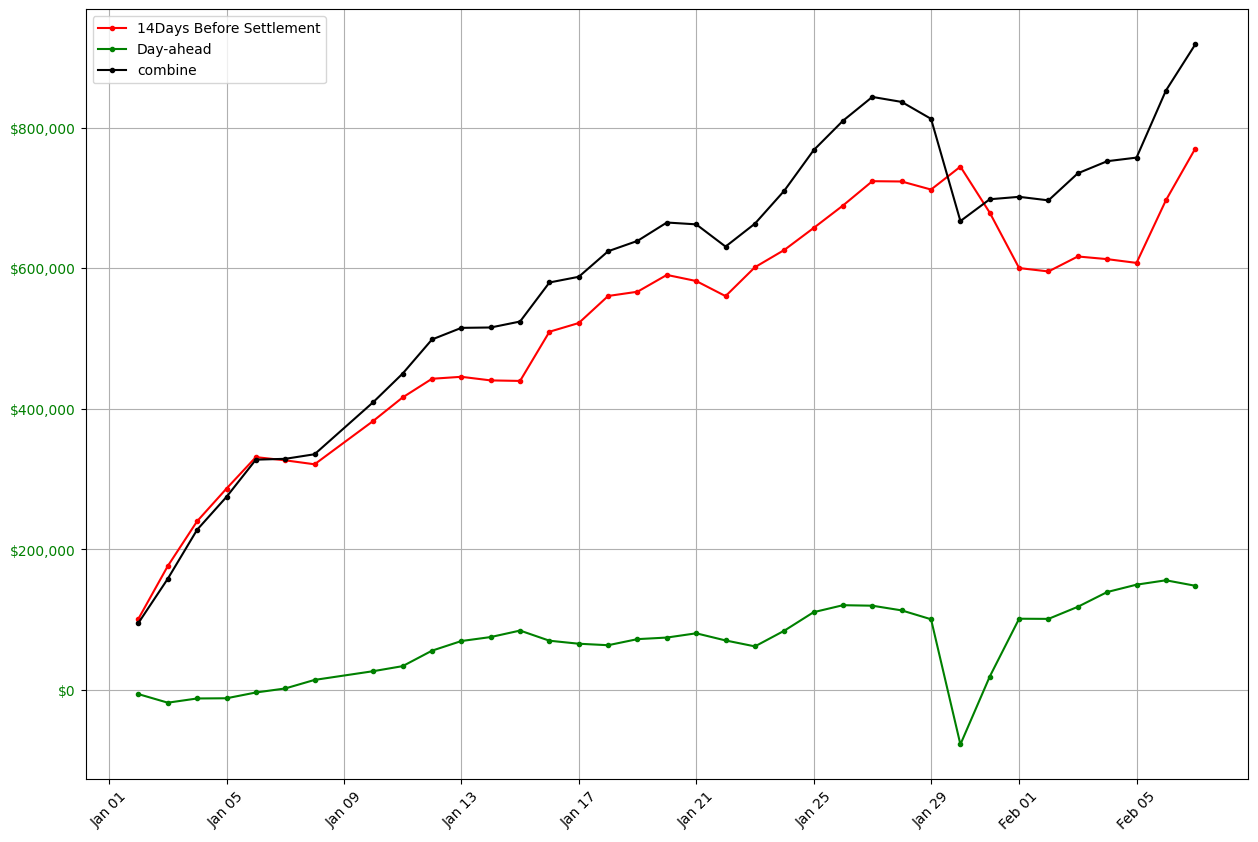

In [343]:
a = s.strat_1().forward_looking_short(start_date ='2023-01-01' ,days_before_settlement = 14, dart_volume = -100, futures_volume = -100, include_uri = False, include_outliers = False)
a['plot']

### checking the relevance against natural gas prdatas and heat rate

In [207]:
#combining natural gas and heat rate data

ng_data = de.ACDB().get_NGLD1_prices()[['date','strip_date','SettlementPrice']]
ng_data = ng_data.rename(columns={'SettlementPrice': 'gas_price'})
hr_data = de.ACDB().get_North_HR()[['date','strip_date','SettlementPrice']]
hr_data = hr_data.rename(columns={'SettlementPrice': 'hr'})

nghr_data = ng_data.merge(hr_data, left_on = 'date', right_on = 'date')



### plotting NG and HR

In [208]:
# fig, ax = plt.subplots(figsize = (15,10))
# ax2 = ax.twinx()


# line_1 = ax.plot(data['date'],data['gas_price'], label = 'NGLD1', marker = ".", color = 'red')
# line_2 = ax2.plot(data['date'],data['hr'], label = "Heat Rate", marker = ".", color = 'green')


# ax.yaxis.set_major_formatter('${x:1,.0f}')

# ax.yaxis.set_tick_params(which='major', labelcolor='red',
#                     labelleft=True, labelright=False)

# ax2.yaxis.set_tick_params(which='major', labelcolor='green',
#                     labelleft=False, labelright=True)

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))

# ax.set_ylabel("NGLD1 Price ($)", color='red', fontsize=14)

# ax2.set_ylabel("Heat Rate", color='green', fontsize=14)



# ax.grid()
# plt.legend(loc = 'upper left',fancybox=True, framealpha=1, shadow=True, borderpad=1)
# plt.xticks(rotation=45)

# plt.show()

##  wind and solar 

In [209]:
inter_rt = de.ACDB().get_intermittent_actuals()

wind_rt = inter_rt[inter_rt['Type'] == 'WindPowerActuals'][['StartTime','SYSTEM_WIDE']]
wind_rt = wind_rt.rename(columns= {'SYSTEM_WIDE':'wind_rt'})
wind_rt['wind_ma15'] = wind_rt['wind_rt'].rolling(15).mean()

solar_rt = inter_rt[inter_rt['Type'] == 'SolarPowerActuals'][['StartTime','SYSTEM_WIDE']]
solar_rt = solar_rt.rename(columns= {'SYSTEM_WIDE':'solar_rt'})
solar_rt['solar_ma15'] = solar_rt['solar_rt'].rolling(15).mean()

wind_rt = wind_rt.resample('D', on  = 'StartTime').mean().reset_index()
solar_rt = solar_rt.resample('D', on  = 'StartTime').mean().reset_index()

inter_data = wind_rt.merge(solar_rt, left_on= 'StartTime',right_on = 'StartTime')
inter_data = inter_data.dropna()

In [210]:


# data = data.resample('M',on ='StartTime').mean().reset_index()

# fig, ax = plt.subplots(figsize = (15,10))
# ax2 = ax.twinx()


# line_1 = ax.plot(data['StartTime'],data['wind_rt']/1000, label = 'wind_rt', marker = ".", color = 'red')
# line_2 = ax2.plot(data['StartTime'],data['solar_rt']/1000, label = "solar_rt", marker = ".", color = 'green')


# ax.yaxis.set_major_formatter('{x:1,.0f}')

# ax.yaxis.set_tick_params(which='major', labelcolor='red',
#                     labelleft=True, labelright=False)

# ax2.yaxis.set_tick_params(which='major', labelcolor='green',
#                     labelleft=False, labelright=True)

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))

# ax.set_ylabel("wind", color='red', fontsize=14)

# ax2.set_ylabel("solar", color='green', fontsize=14)



# ax.grid()
# plt.legend(loc = 'upper left',fancybox=True, framealpha=1, shadow=True, borderpad=1)
# plt.xticks(rotation=45)

# plt.show()

In [ ]:
# Combining strategy data, wind data, gas data and HR

strat_data = a['table'][['trade_date','north_dart','spread']]

_data= strat_data.merge(inter_data, left_on = 'trade_date', right_on = 'StartTime')
final_data = _data.merge(nghr_data, left_on = 'trade_date', right_on = 'date')
final_data['total_inter'] = final_data['wind_rt'] + final_data['solar_rt']






C:\Users\UI758624\AppData\Local\Temp\1\ipykernel_20396\2882973117.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('M',on ='trade_date').mean().reset_index()


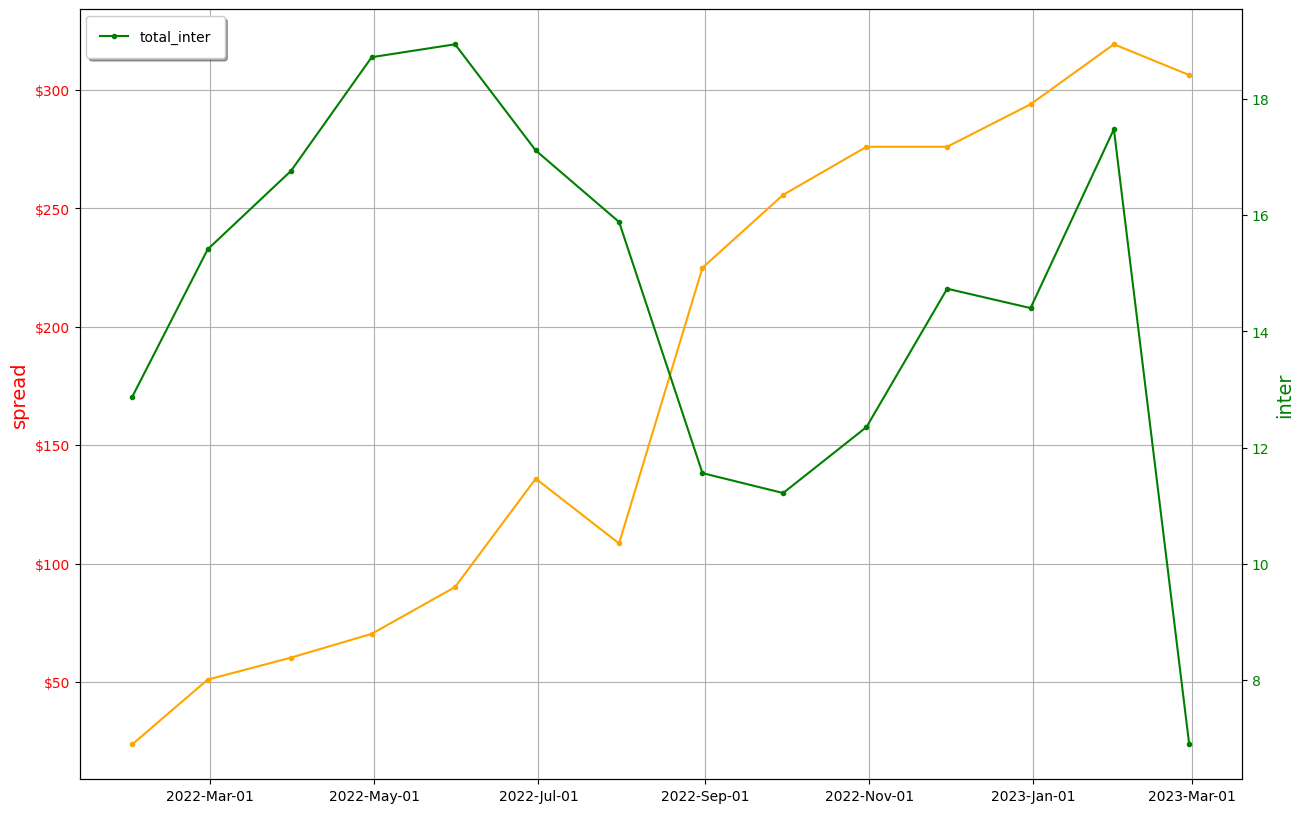

In [ ]:
data = final_data

data = data.resample('M',on ='trade_date').mean().reset_index()

fig, ax = plt.subplots(figsize = (15,10))
ax2 = ax.twinx()


#line_1 = ax.plot(data['trade_date'],data['north_dart'].cumsum(), label = 'north_dart', marker = ".", color = 'red')
line_2 = ax.plot(data['trade_date'],data['spread'].cumsum(), label = 'spread', marker = ".", color = 'orange')

line_3 = ax2.plot(data['trade_date'],data['total_inter']/1000, label = "total_inter", marker = ".", color = 'green')
#line_4 = ax2.plot(data['trade_date'],data['wind_rt']/1000, label = "wind_rt", marker = ".", color = 'blue')




ax.yaxis.set_major_formatter('${x:1,.0f}')

ax.yaxis.set_tick_params(which='major', labelcolor='red',
                    labelleft=True, labelright=False)

ax2.yaxis.set_tick_params(which='major', labelcolor='green',
                    labelleft=False, labelright=True)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))

ax.set_ylabel("spread", color='red', fontsize=14)

ax2.set_ylabel("inter", color='green', fontsize=14)



ax.grid()
plt.legend(loc = 'upper left',fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xticks(rotation=45)

plt.show()

C:\Users\UI758624\AppData\Local\Temp\1\ipykernel_20396\3134442646.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('W',on ='trade_date').mean().reset_index()


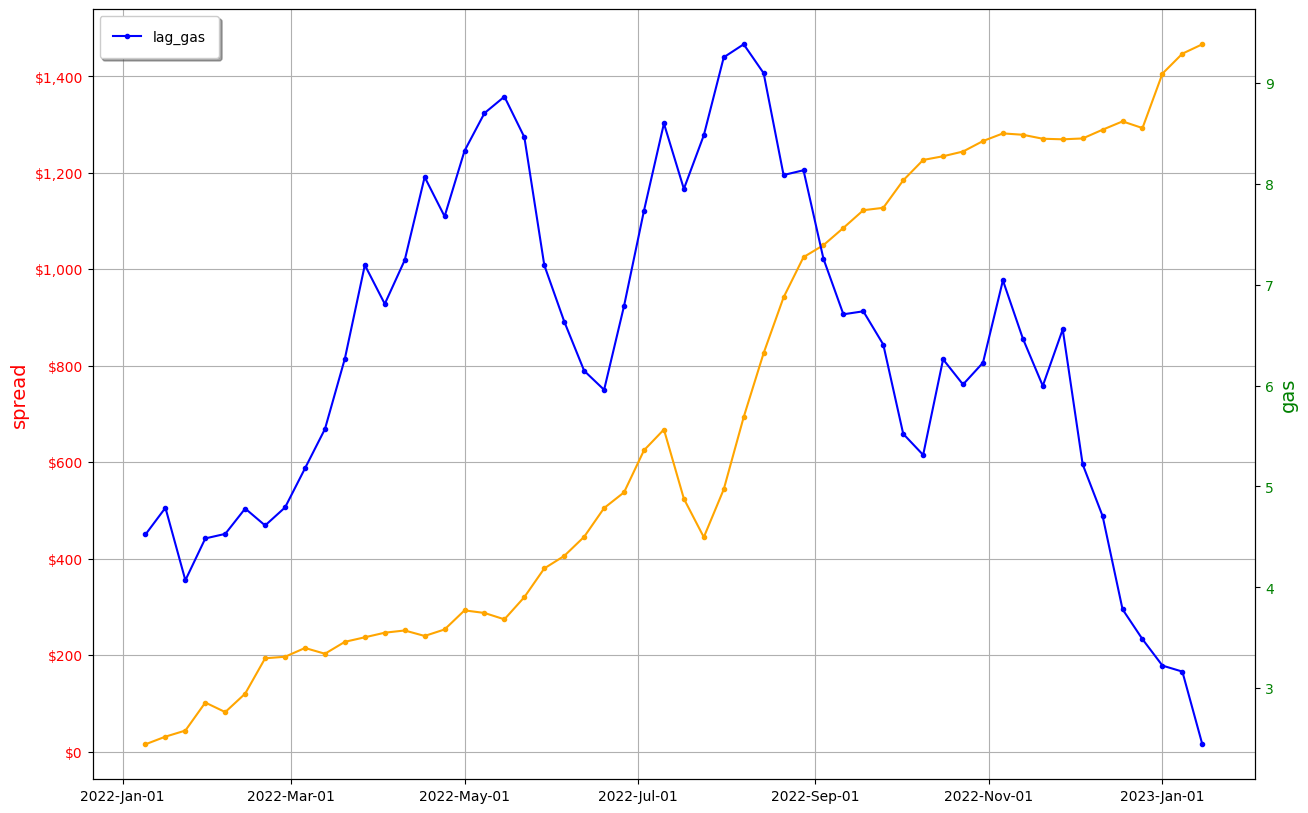

In [ ]:
data = final_data
data['lag_gas'] = data['gas_price'].shift(-14)
data['lag_hr'] = data['hr'].shift(-14)

data = data.resample('W',on ='trade_date').mean().reset_index()

data = data.dropna()

data = data[data['trade_date']>'2019-12-01']


fig, ax = plt.subplots(figsize = (15,10))
ax2 = ax.twinx()


#line_1 = ax.plot(data['trade_date'],data['north_dart'].cumsum(), label = 'north_dart', marker = ".", color = 'red')
line_2 = ax.plot(data['trade_date'],data['spread'].cumsum(), label = 'spread', marker = ".", color = 'orange')

#line_3 = ax2.plot(data['trade_date'],data['lag_hr'], label = "lag_hr", marker = ".", color = 'green')
line_4 = ax2.plot(data['trade_date'],data['lag_gas'], label = "lag_gas", marker = ".", color = 'blue')




ax.yaxis.set_major_formatter('${x:1,.0f}')

ax.yaxis.set_tick_params(which='major', labelcolor='red',
                    labelleft=True, labelright=False)

ax2.yaxis.set_tick_params(which='major', labelcolor='green',
                    labelleft=False, labelright=True)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))

ax.set_ylabel("spread", color='red', fontsize=14)

ax2.set_ylabel("gas", color='green', fontsize=14)



ax.grid()
plt.legend(loc = 'upper left',fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xticks(rotation=45)

plt.show()

In [ ]:
final_data.corr()

C:\Users\UI758624\AppData\Local\Temp\1\ipykernel_20396\4285913857.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_data.corr()


,north_dart,spread,wind_rt,wind_ma15,solar_rt,solar_ma15,gas_price,hr,total_inter,lag_gas,lag_hr
north_dart,1.000000,0.051287,0.084375,0.048165,0.027827,0.020695,0.037897,-0.118784,0.093237,0.000320,0.023440
spread,0.051287,1.000000,0.103154,0.067272,0.022478,0.057640,0.197426,-0.142372,0.111758,0.101177,0.040818
wind_rt,0.084375,0.103154,1.000000,0.937322,-0.302127,-0.246474,-0.149356,0.015033,0.982873,-0.016105,0.154861
wind_ma15,0.048165,0.067272,0.937322,1.000000,-0.268882,-0.246419,-0.133873,0.032414,0.924034,-0.000625,0.183174
solar_rt,0.027827,0.022478,-0.302127,-0.268882,1.000000,0.978249,0.435999,0.464563,-0.121280,0.507534,0.323435
solar_ma15,0.020695,0.057640,-0.246474,-0.246419,0.978249,1.000000,0.470693,0.486537,-0.067533,0.539899,0.336267
gas_price,0.037897,0.197426,-0.149356,-0.133873,0.435999,0.470693,1.000000,0.187429,-0.071235,0.680050,0.209355
hr,-0.118784,-0.142372,0.015033,0.032414,0.464563,0.486537,0.187429,1.000000,0.105463,0.366128,0.532351
total_inter,0.093237,0.111758,0.982873,0.924034,-0.121280,-0.067533,-0.071235,0.105463,1.000000,0.081522,0.224566
lag_gas,0.000320,0.101177,-0.016105,-0.000625,0.507534,0.539899,0.680050,0.366128,0.081522,1.000000,0.183123


# Term Structure

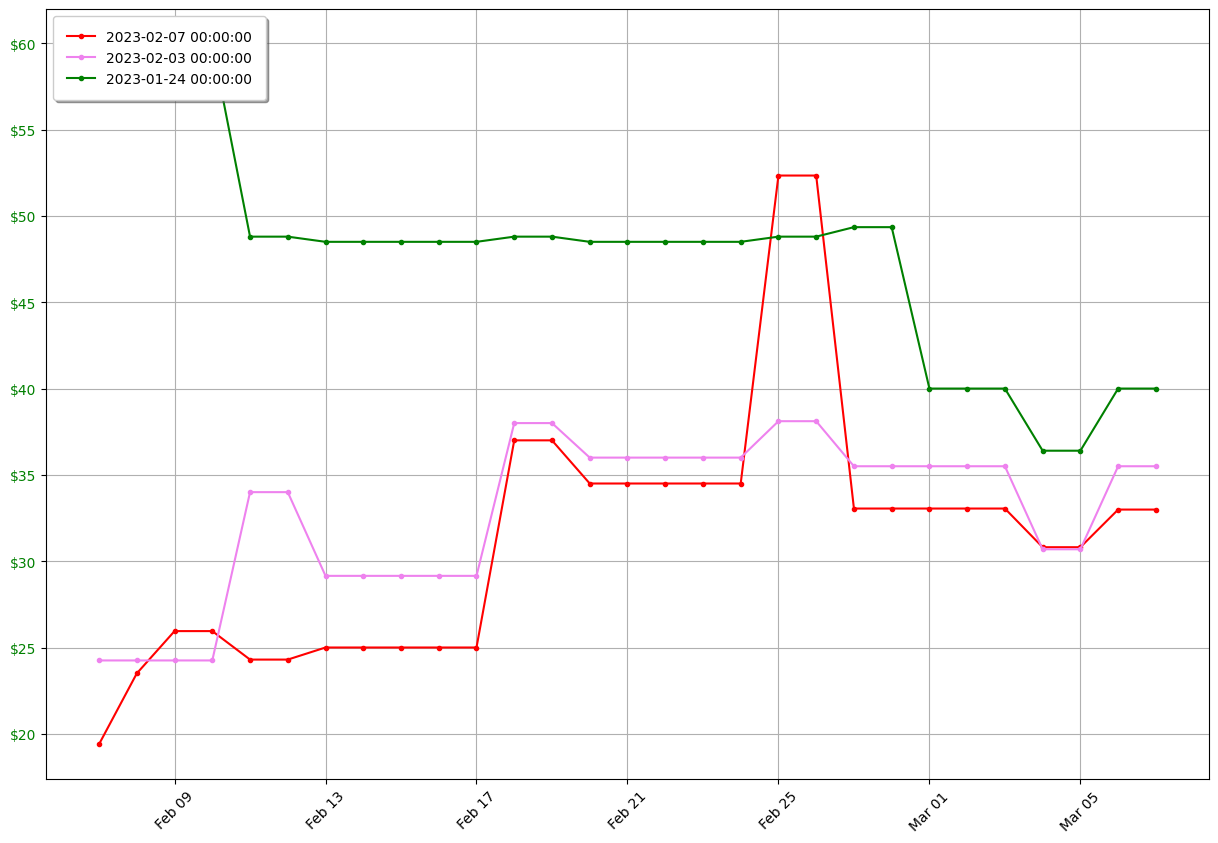

In [326]:
de.ACDB().get_term_structure(enter_date = '2023-02-08',window_1 = 4, window_2 = 10, days_ahead = 28, contract_name = "END")

# Combined with Eser

In [213]:
#s.strat_1().custom_allocation_forward_looking(start_date ='2023-01-01' ,days_before_settlement = 14, dart_volume = -100, futures_volume = -100, include_uri = False, include_outliers = False)


# New power price DF to identify delta between spot and 2nd week contract

In [327]:
#DART Pricing

dart_data = de.ACDB().get_dart_data()[['StartTime','north_rt','north_da','north_dart']]


#Selecting on-peak hours

dart_data['hour'] = dart_data['StartTime'].dt.hour + 1
list_hours = [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
dart_data = dart_data[dart_data['hour'].isin(list_hours)]

#Resampling dart data into daily averages

dart_data = dart_data.resample('D', on  = 'StartTime').mean().reset_index()







ice = de.ACDB().get_ICE_North_Prices()[de.ACDB().get_ICE_North_Prices()['TradeDate']>'2018-01-01'][['TradeDate','Strip','SettlementPrice','Contract']]
#wknd_ice = ice

ice = ice[ice['Contract'] == 'END']
#wknd_ice = wknd_ice[wknd_ice['Contract'] == 'NED']

data = pd.DataFrame()

data['trade_date'] = ice['TradeDate'].unique()
data['second_trade_date'] = data['trade_date'].apply(lambda x:x + timedelta(days = -14))  #two weeks out
data['first_trade_date'] = data['trade_date'].apply(lambda x:x + timedelta(days = -7))
data['spot_date'] = data['trade_date'].apply(lambda x:x + timedelta(days = 0))

first_merge = data.merge(ice, left_on = ['trade_date','second_trade_date'], right_on = ['Strip','TradeDate'])
first_merge = first_merge.rename(columns = {'SettlementPrice':'second_week'})

second_merge = first_merge.merge(ice, left_on = ['trade_date','first_trade_date'], right_on = ['Strip','TradeDate'])
second_merge = second_merge.rename(columns = {'SettlementPrice':'first_week'})

df = second_merge.merge(ice, left_on = ['trade_date','spot_date'], right_on = ['Strip','TradeDate'])
df = df.rename(columns = {'SettlementPrice':'spot_price'})


#Merging ICE and DART prices

df = df.merge(dart_data, left_on = 'trade_date', right_on = 'StartTime')


#Adding gas prices and heat rate

#combining natural gas and heat rate data

# ng_data = de.ACDB().get_NGLD1_prices()[['date','strip_date','SettlementPrice']]
# ng_data = ng_data.rename(columns={'SettlementPrice': 'gas_price'})
# hr_data = de.ACDB().get_North_HR()[['date','strip_date','SettlementPrice']]
# hr_data = hr_data.rename(columns={'SettlementPrice': 'hr'})

# nghr_data = ng_data.merge(hr_data, left_on = 'date', right_on = 'date')




df = df[['trade_date','second_trade_date','spot_date','second_week','spot_price','first_week','north_da']]
df['basis'] = df['second_week'] - df['spot_price']
df['basis_2_1'] = df['second_week'] - df['first_week']
df['basis_da'] = df['second_week'] - df['north_da']


### Plotting basis and 2nd vs spot prices

C:\Users\UI758624\AppData\Local\Temp\1\ipykernel_7424\3089356835.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('W',on ='trade_date').mean().reset_index()


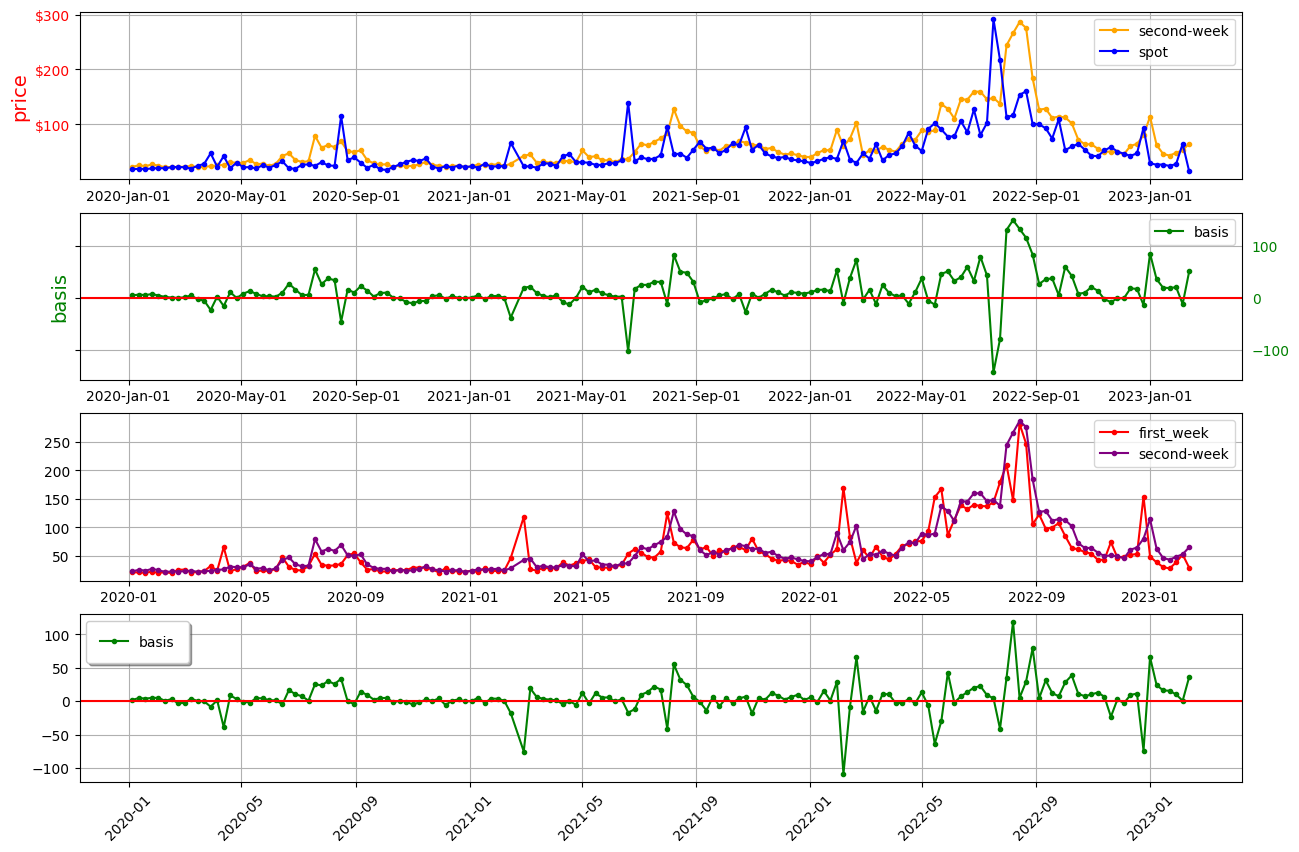

In [328]:
data = df

start = '2020-01-01'
end = '2023-02-07'

data = data[data.trade_date.between(start,end)]


data = data.resample('W',on ='trade_date').mean().reset_index()

data = data[data['spot_price'] < 5000]   #Cleaning this up for visualization



data = data.dropna()

fig, (ax, ax2, ax3, ax4) = plt.subplots(4,figsize = (15,10))
#ax2 = ax.twinx()


line_1 = ax3.plot(data['trade_date'],data['first_week'], label = 'first_week', marker = ".", color = 'red')
line_5 = ax3.plot(data['trade_date'],data['second_week'], label = 'second-week', marker = ".", color = 'purple')



line_2 = ax.plot(data['trade_date'],data['second_week'], label = 'second-week', marker = ".", color = 'orange')

line_3 = ax2.plot(data['trade_date'],data['basis_da'], label = "basis", marker = ".", color = 'green')
line_4 = ax.plot(data['trade_date'],data['north_da'], label = "spot", marker = ".", color = 'blue')

line_6 = ax4.plot(data['trade_date'],data['basis_2_1'], label = "basis", marker = ".", color = 'green')


ax.yaxis.set_major_formatter('${x:1,.0f}')

ax.yaxis.set_tick_params(which='major', labelcolor='red',
                    labelleft=True, labelright=False)

ax2.yaxis.set_tick_params(which='major', labelcolor='green',labelleft=False, labelright=True)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))


ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))

ax.set_ylabel("price", color='red', fontsize=14)

ax2.set_ylabel("basis", color='green', fontsize=14)

ax2.axhline(y=0, color='r', linestyle='-')
ax4.axhline(y=0, color='r', linestyle='-')

ax.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.legend(loc = 'upper left',fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xticks(rotation=45)

plt.show()

### monthly summary of basis summary

In [329]:
monthly_summary = data.resample('M',on ='trade_date').mean().reset_index()  #accessing df

monthly_summary = monthly_summary[monthly_summary['basis_2_1']<5000]  #clearing outliers

#removing 2023 since it only has January

monthly_summary = monthly_summary[monthly_summary['trade_date'] <'2023-01-01']

monthly_summary['year'] = monthly_summary['trade_date'].dt.year
monthly_summary['month'] = monthly_summary['trade_date'].dt.month


summary = monthly_summary.pivot(index = 'month',columns ='year',values = 'basis')

summary

year,2020,2021,2022
month,,,
1,5.896625,3.66,18.046
2,0.5,-95.755333,-2.2325
3,-8.648,6.2055,7.438
4,2.306875,-24.205625,7.537625
5,6.8008,10.7468,23.5083
6,17.7995,-28.416,53.299
7,24.79,29.9725,-10.7616
8,5.6168,44.0772,118.8625
9,11.277,3.047,34.766875


In [330]:
monthly_summary = data.resample('M',on ='trade_date').sum().reset_index()  #accessing df

#monthly_summary = monthly_summary[monthly_summary['basis']<5000]  #clearing outliers

#removing 2023 since it only has January

monthly_summary = monthly_summary[monthly_summary['trade_date'] <'2023-01-01']

monthly_summary['year'] = monthly_summary['trade_date'].dt.year
monthly_summary['month'] = monthly_summary['trade_date'].dt.month


summary = monthly_summary.pivot(index = 'month',columns ='year',values = 'basis_2_1')

summary

year,2020,2021,2022
month,,,
1,14.779,9.5975,48.61
2,4.94,-92.766,-67.9
3,-7.87,30.082,13.242
4,-26.3225,-9.2825,-6.124
5,6.544,31.104,-45.341
6,22.828,-27.154,37.966
7,56.56,61.96,28.632
8,84.024,75.426,231.404
9,29.888,-16.452,54.4375


In [331]:
#outliers (negative basis excel export for Neel and Eser)

# outliers = df.resample('D',on ='trade_date').mean().reset_index()

# outliers = df[df['basis']<-20]
# outliers.to_excel('negative_basis.xlsx')

### Natural Gas basis comparison


In [332]:
#Loading Nat Gas Prices
nat_gas = de.ACDB().get_NGLD1_prices()

In [333]:
nat_gas['nat_gas_basis'] = nat_gas['second_nearest'] - nat_gas['SettlementPrice']

nat_gas['nat_gas_basis_2'] = nat_gas['third_nearest'] - nat_gas['SettlementPrice']

In [334]:
#Loading sotrage numbers

gas_storage = pd.read_excel('us_national_gas_inventory.xlsx')

#Merging with nat_gas data

gas_storage = gas_storage.resample('D',on ='Date').mean().reset_index()

nat_gas_storage = nat_gas.merge(gas_storage, left_on = 'date', right_on = 'Date')

storage = gas_storage.resample('M',on ='Date').mean().reset_index()
storage['month'] = storage['Date'].dt.month
monthly_rolling_avg = storage.groupby(['month']).rolling(5).mean().reset_index()

gas_monthly_avg = storage.merge(monthly_rolling_avg, left_on= storage.index, right_on = 'level_1')
gas_monthly_avg= gas_monthly_avg[gas_monthly_avg.Date.between('2018-01-01','2025-01-31')]

gas_monthly_avg = gas_monthly_avg.resample('D', on ='Date').mean().bfill().reset_index()
gas_monthly_avg = gas_monthly_avg.rename(columns={'Inventory_y':'SMA5yr'})


#Merging Monthly avg storage

nat_gas_storage = nat_gas_storage.merge(gas_monthly_avg, left_on='date',right_on ='Date' )
nat_gas_storage = nat_gas_storage[['date','Inventory','SMA5yr']]

nat_gas_storage['storage_delta'] = nat_gas_storage['Inventory'] - nat_gas_storage['SMA5yr']

C:\Users\UI758624\AppData\Local\Temp\1\ipykernel_7424\2620069113.py:13: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  monthly_rolling_avg = storage.groupby(['month']).rolling(5).mean().reset_index()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


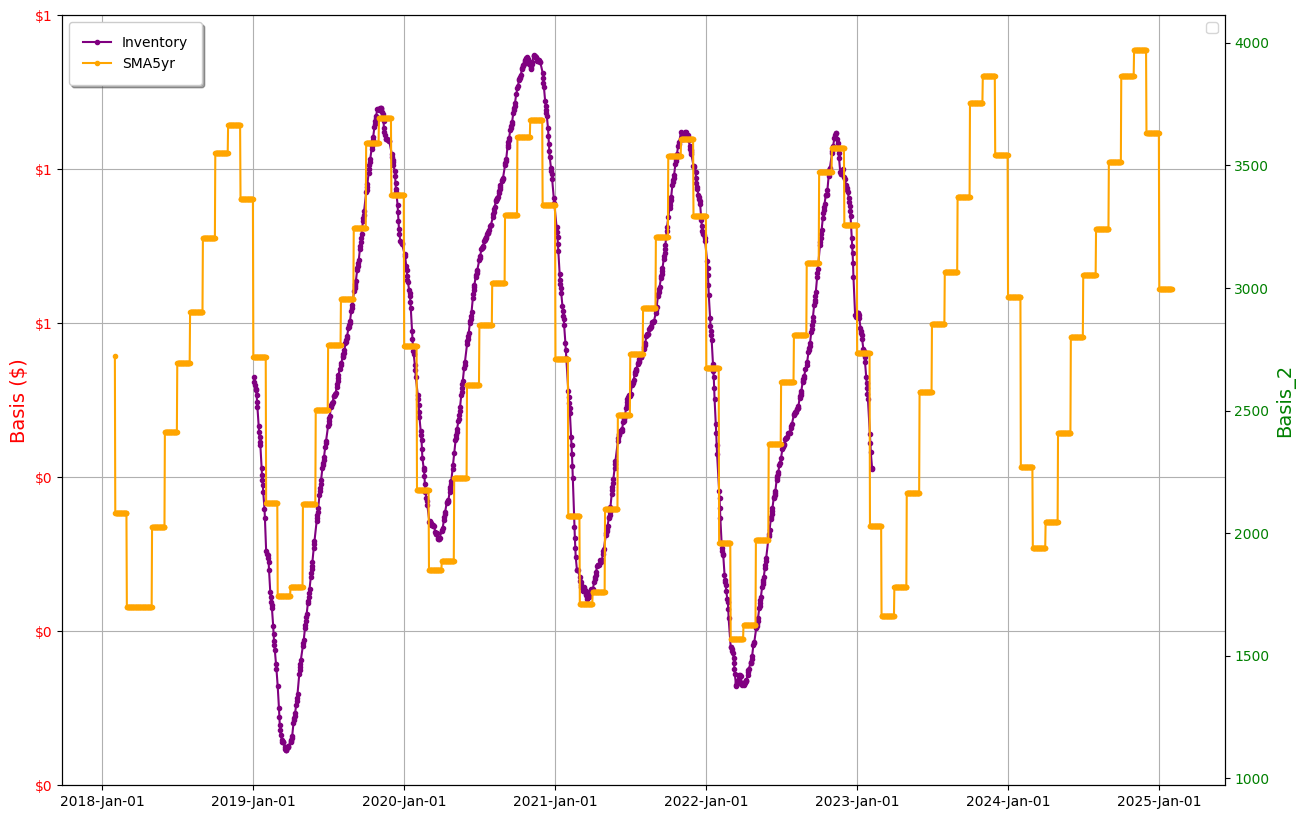

In [335]:
data = nat_gas_storage


fig, ax = plt.subplots(figsize = (15,10))
ax2 = ax.twinx()


#line_1 = ax.plot(data['date'],data['SettlementPrice'], label = 'basis', marker = ".", color = 'red')
#line_2 = ax.plot(data['date'],data['second_nearest'], label = "basis_2", marker = ".", color = 'green')
line_3 = ax2.plot(data['date'],data['Inventory'], label = "Inventory", marker = ".", color = 'purple')
line_4 = ax2.plot(gas_monthly_avg['Date'],gas_monthly_avg['SMA5yr'], label = "SMA5yr", marker = ".", color = 'orange')


ax.yaxis.set_major_formatter('${x:1,.0f}')

ax.yaxis.set_tick_params(which='major', labelcolor='red',
                    labelleft=True, labelright=False)

ax2.yaxis.set_tick_params(which='major', labelcolor='green',
                    labelleft=False, labelright=True)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))

ax.set_ylabel("Basis ($)", color='red', fontsize=14)

ax2.set_ylabel("Basis_2", color='green', fontsize=14)


ax2.legend()
ax.legend()
ax.grid()
plt.legend(loc = 'upper left',fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xticks(rotation=45)

plt.show()

In [336]:
#Merging Nat_gas basis with 2nd week basis

gas = nat_gas[['date','nat_gas_basis','nat_gas_basis_2']]

merge_data = df.merge(gas, left_on = 'trade_date',right_on = 'date')

C:\Users\UI758624\AppData\Local\Temp\1\ipykernel_7424\2303035369.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('W',on ='trade_date').mean().reset_index()


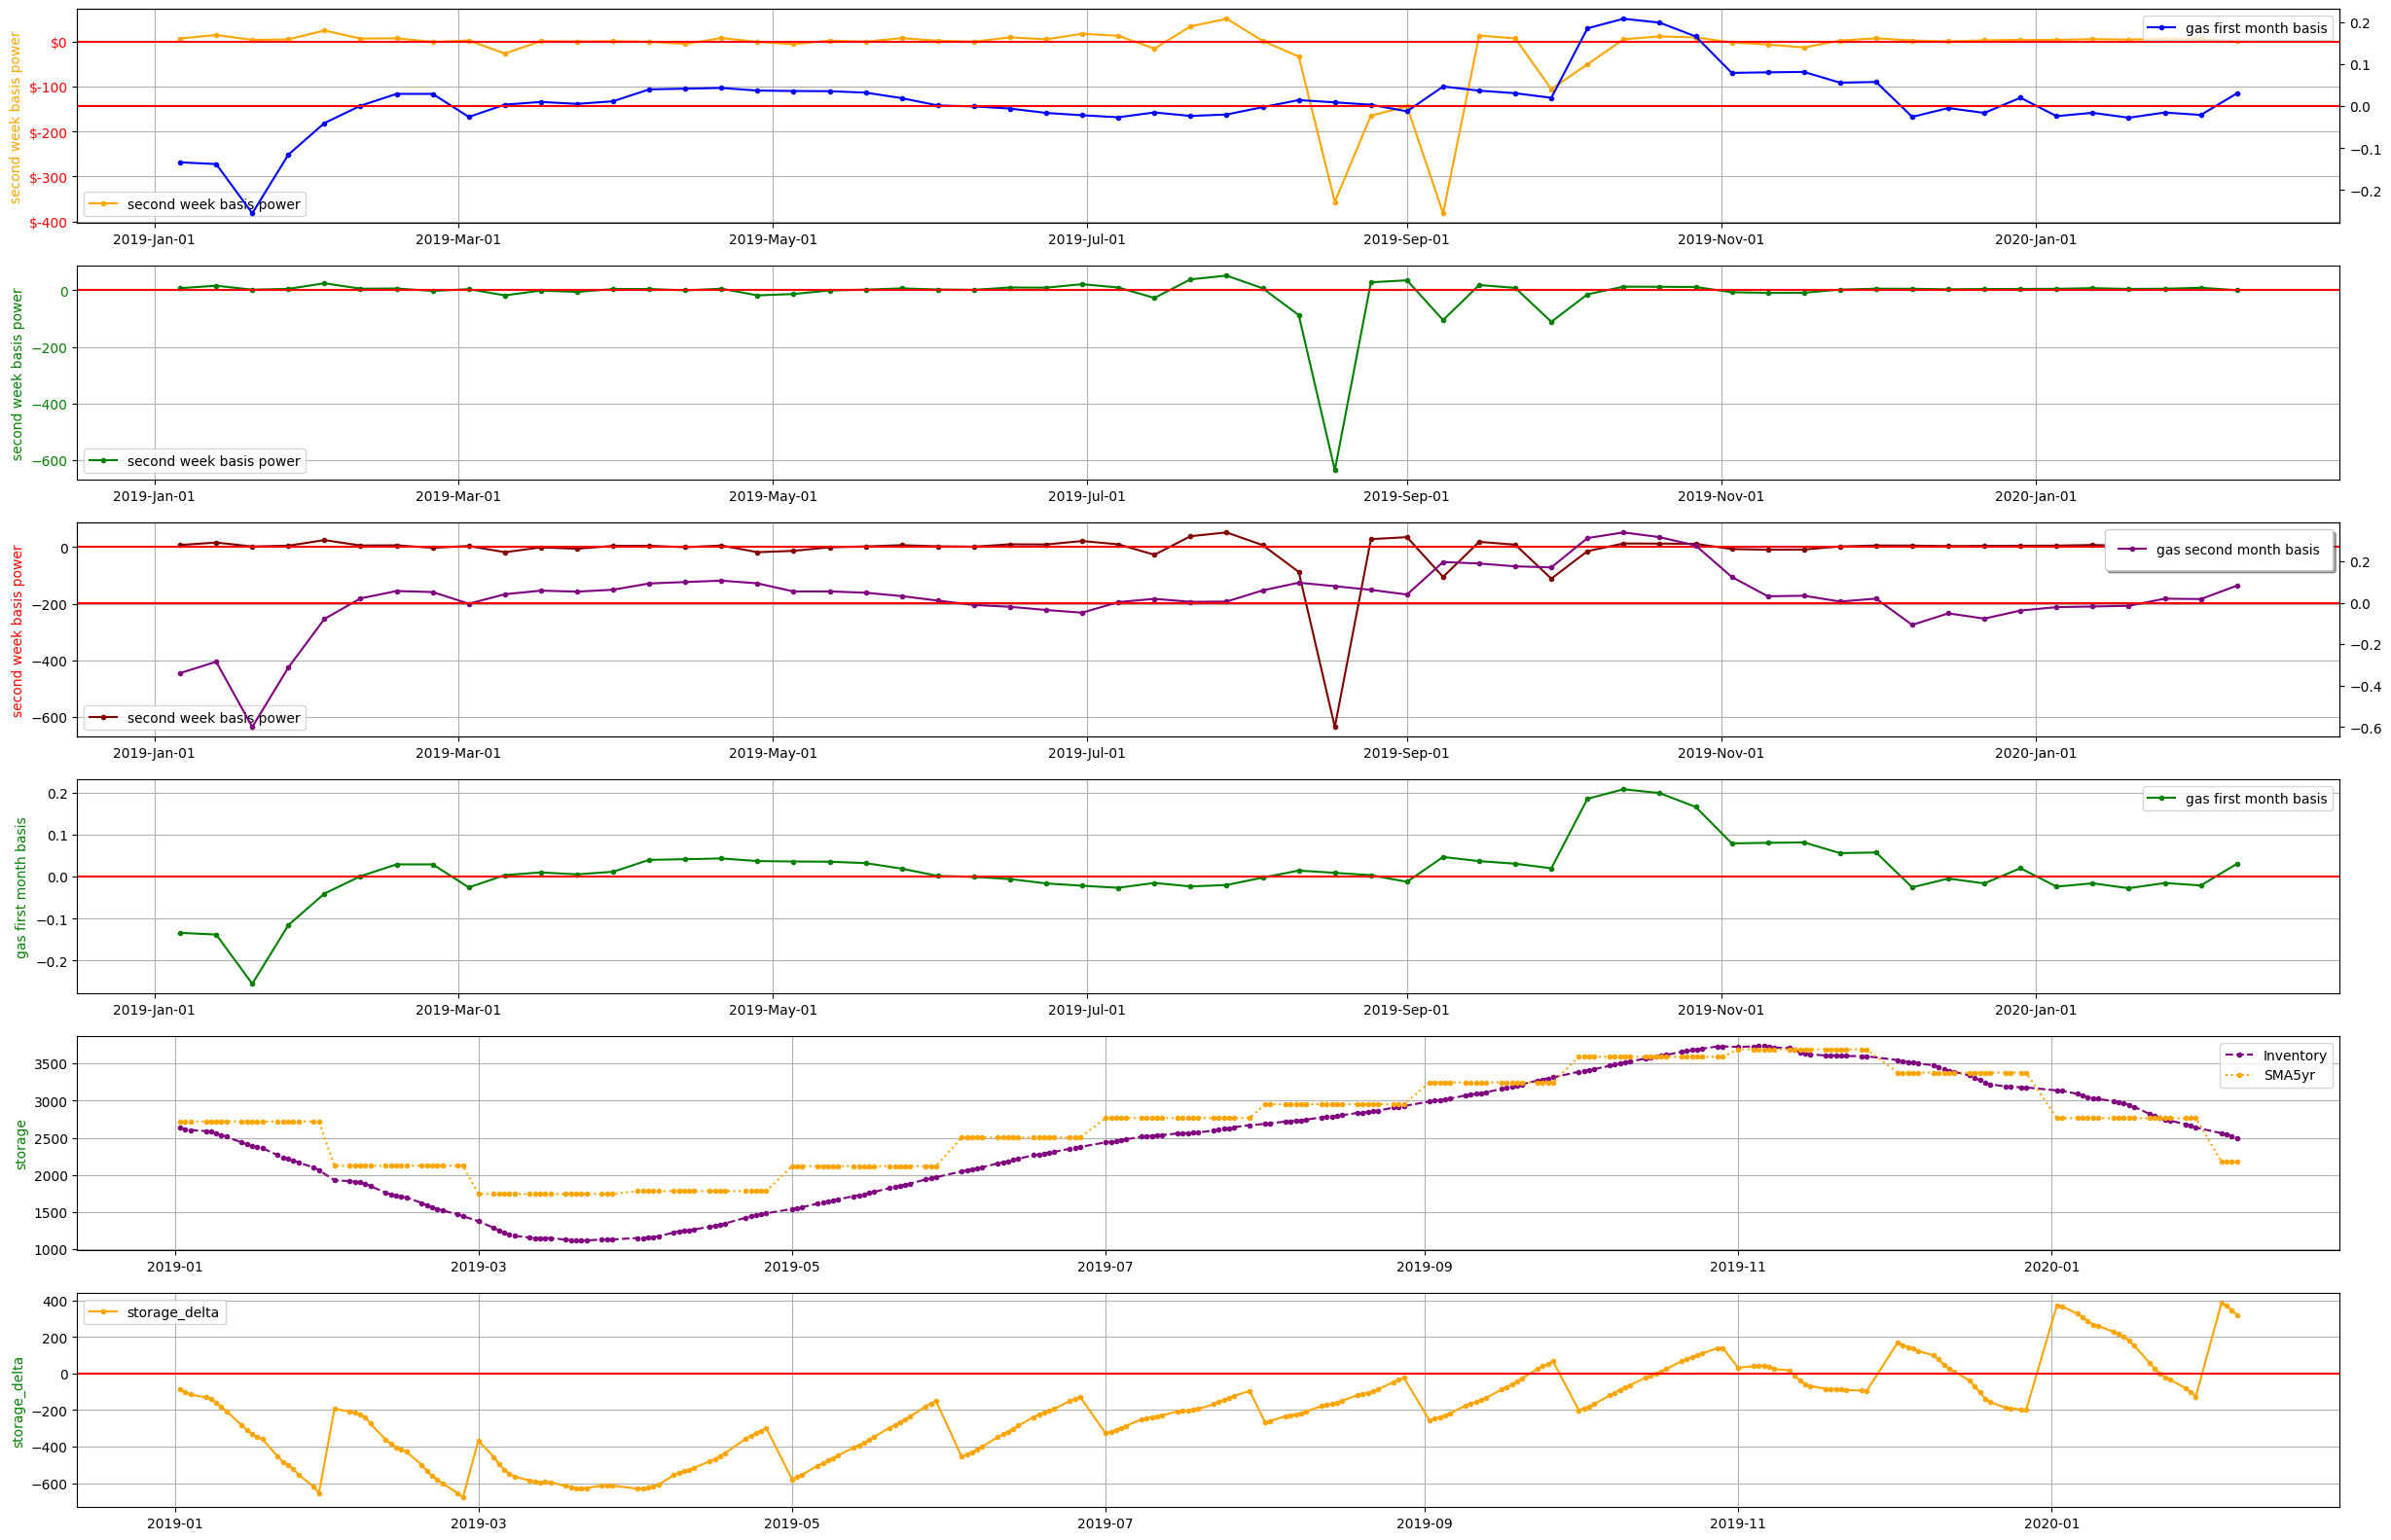

In [337]:
data = merge_data

start = '2018-01-01'
end = '2020-02-06'

data = data[data.trade_date.between(start,end)]


data = data.resample('W',on ='trade_date').mean().reset_index()

#data = data[data['spot_price'] < 5000]   #Cleaning this up for visualization


data = data.dropna()

storage_actual = nat_gas_storage[nat_gas_storage.date.between(start,end)]


fig, (ax, ax2, ax3, ax4, ax7, ax8) = plt.subplots(6,figsize = (30,20))
ax5 = ax.twinx()
ax6 = ax3.twinx()





#graph 1
line_2 = ax.plot(data['trade_date'],data['basis_da'], label = 'second week basis power', marker = ".", color = 'orange')
line_4 = ax5.plot(data['trade_date'],data['nat_gas_basis'], label = "gas first month basis", marker = ".", color = 'blue')

#graph 2
line_3 = ax2.plot(data['trade_date'],data['basis'], label = "second week basis power", marker = ".", color = 'green')


#graph 3
line_1 = ax3.plot(data['trade_date'],data['basis'], label = 'second week basis power', marker = ".", color = 'maroon')
line_5 = ax6.plot(data['trade_date'],data['nat_gas_basis_2'], label = 'gas second month basis', marker = ".", color = 'purple')

#Graph 4
line_6 = ax4.plot(data['trade_date'],data['nat_gas_basis'], label = "gas first month basis", marker = ".", color = 'green')

#Graph 5

line_7 = ax7.plot(storage_actual['date'],storage_actual['Inventory'], label = "Inventory", marker = ".", color = 'purple',linestyle = '--')
line_8 = ax7.plot(storage_actual['date'],storage_actual['SMA5yr'], label = "SMA5yr", marker = ".", color = 'orange',linestyle =':')

#graph 6

line_8 = ax8.plot(storage_actual['date'],storage_actual['storage_delta'], label = "storage_delta", marker = ".", color = 'orange')



ax.yaxis.set_major_formatter('${x:1,.0f}')

ax.yaxis.set_tick_params(which='major', labelcolor='red',
                    labelleft=True, labelright=False)

ax2.yaxis.set_tick_params(which='major', labelcolor='green',labelleft=True, labelright=False)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))


ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))

ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))

ax.set_ylabel("second week basis power", color='orange', fontsize=10)

ax2.set_ylabel("second week basis power", color='green', fontsize=10)

ax3.set_ylabel("second week basis power", color='red', fontsize=10)

ax4.set_ylabel("gas first month basis", color='green', fontsize=10)

ax7.set_ylabel("storage", color='green', fontsize=10)

ax8.set_ylabel("storage_delta", color='green', fontsize=10)

ax.axhline(y=0, color='r', linestyle='-')
ax2.axhline(y=0, color='r', linestyle='-')
ax3.axhline(y=0, color='r', linestyle='-')
ax4.axhline(y=0, color='r', linestyle='-')
ax5.axhline(y=0, color='r', linestyle='-')
ax6.axhline(y=0, color='r', linestyle='-')
ax8.axhline(y=0, color='r', linestyle='-')

ax.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax7.grid()
ax8.grid()

ax.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()


plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xticks(rotation=45)

plt.show()

In [338]:
data = merge_data

monthly_summary = data.resample('M',on ='trade_date').sum().reset_index()  #accessing df

#monthly_summary = monthly_summary[monthly_summary['basis']<5000]  #clearing outliers

#removing 2023 since it only has January

monthly_summary = monthly_summary[monthly_summary['trade_date'] <'2023-01-01']

monthly_summary['year'] = monthly_summary['trade_date'].dt.year
monthly_summary['month'] = monthly_summary['trade_date'].dt.month


summary = monthly_summary.pivot(index = 'month',columns ='year',values = 'basis_da')

summary

C:\Users\UI758624\AppData\Local\Temp\1\ipykernel_7424\471720687.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_summary = data.resample('M',on ='trade_date').sum().reset_index()  #accessing df


year,2019,2020,2021,2022
month,,,,
1,190.1225,111.235625,40.456875,449.8375
2,110.619375,15.205625,-35416.715625,491.456875
3,-111.96875,-126.240625,185.323125,195.136875
4,15.871875,14.751875,-50.3575,156.561875
5,59.464375,142.609375,191.819375,375.5075
6,139.05625,276.48,-355.090625,915.36125
7,465.4575,568.795625,373.950625,-519.896875
8,-3230.91,57.876875,979.6375,2444.49625
9,-2220.221875,241.736875,25.66,520.505


In [339]:
data = merge_data

monthly_summary = data.resample('M',on ='trade_date').mean().reset_index()  #accessing df

#monthly_summary = monthly_summary[monthly_summary['basis']<5000]  #clearing outliers

#removing 2023 since it only has January

monthly_summary = monthly_summary[monthly_summary['trade_date'] <'2023-01-01']

monthly_summary['year'] = monthly_summary['trade_date'].dt.year
monthly_summary['month'] = monthly_summary['trade_date'].dt.month


summary = monthly_summary.pivot(index = 'month',columns ='year',values = 'nat_gas_basis_2')

summary

C:\Users\UI758624\AppData\Local\Temp\1\ipykernel_7424\2454844835.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_summary = data.resample('M',on ='trade_date').mean().reset_index()  #accessing df


year,2019,2020,2021,2022
month,,,,
1,-0.351278,-0.000556,-0.009688,-0.359684
2,0.032167,0.071444,-0.029556,-0.058278
3,0.053158,0.130842,0.095857,0.076762
4,0.098944,0.317176,0.145824,0.175059
5,0.0415,0.282737,0.066056,0.060368
6,-0.0255,0.13955,0.004,-0.03115
7,0.008238,0.163476,-0.02605,-0.102895
8,0.07555,0.454,0.080316,0.052381
9,0.184632,0.9468,0.1446,0.231235


In [340]:
data = nat_gas_storage

monthly_summary = data.resample('M',on ='date').mean().reset_index()  #accessing df

#monthly_summary = monthly_summary[monthly_summary['basis']<5000]  #clearing outliers

#removing 2023 since it only has January

monthly_summary = monthly_summary[monthly_summary['date'] <'2023-02-01']

monthly_summary['year'] = monthly_summary['date'].dt.year
monthly_summary['month'] = monthly_summary['date'].dt.month


summary = monthly_summary.pivot(index = 'month',columns ='year',values = 'Inventory')

summary

year,2019,2020,2021,2022,2023
month,,,,,
1,2393.115276,2909.028833,2987.753620,2738.445016,2756.796937
2,1708.535540,2331.076042,2206.283586,1884.564154,NaN
3,1170.591623,2012.437710,1767.261148,1441.342215,NaN
4,1294.012222,2129.221711,1864.939818,1452.959331,NaN
5,1747.492013,2514.038936,2123.571257,1750.647599,NaN
6,2213.283033,2929.913957,2460.533746,2144.881441,NaN
7,2548.286220,3194.526305,2658.029248,2387.942475,NaN
8,2798.874367,3376.298879,2821.192145,2554.479925,NaN
9,3137.456151,3639.577672,3058.140214,2868.584746,NaN


<AxesSubplot: xlabel='month'>

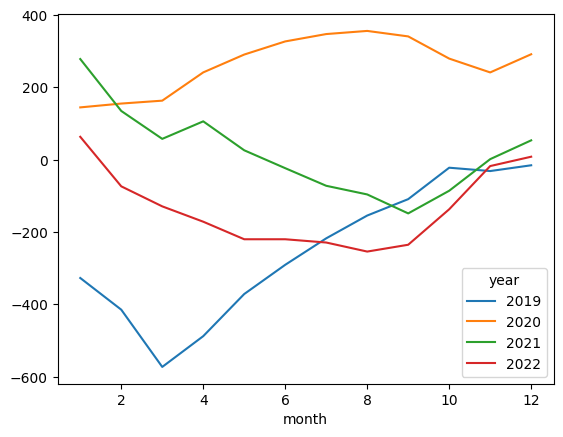

In [341]:
data = nat_gas_storage

monthly_summary = data.resample('M',on ='date').mean().reset_index()  #accessing df

#monthly_summary = monthly_summary[monthly_summary['basis']<5000]  #clearing outliers

#removing 2023 since it only has January

monthly_summary = monthly_summary[monthly_summary['date'] <'2023-01-01']

monthly_summary['year'] = monthly_summary['date'].dt.year
monthly_summary['month'] = monthly_summary['date'].dt.month


summary = monthly_summary.pivot(index = 'month',columns ='year',values = 'storage_delta')

summary.plot()

<AxesSubplot: xlabel='month'>

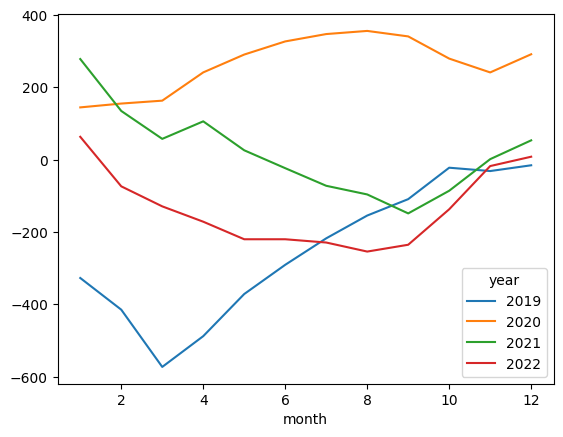

In [342]:
summary.plot()